### Reference: https://realpython.com/courses/plot-pandas-data-visualization/

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max.columns", None)
%matplotlib inline

### Read in the data

In [38]:
raw_data_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv"

In [39]:
df = pd.read_csv(raw_data_url)
type(df)

pandas.core.frame.DataFrame

In [56]:
df.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,2924,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,1085,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,71298,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,55450,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


### Get an overview of how the data is distributed

<AxesSubplot:xlabel='Rank'>

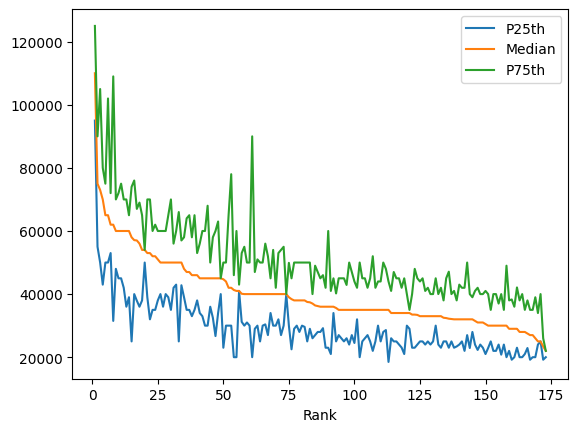

In [41]:
df.plot.line(x='Rank', y=['P25th', 'Median', 'P75th'])

In [42]:
median_column = df['Median']
type(median_column)

pandas.core.series.Series

<AxesSubplot:ylabel='Frequency'>

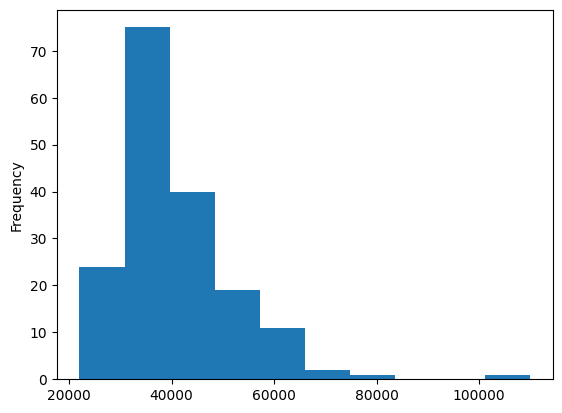

In [43]:
median_column.plot.hist()

### Analyze the outliers

In [44]:
top_5 = df.sort_values(by='Median', ascending=False).head(5)
type(top_5)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Major'>

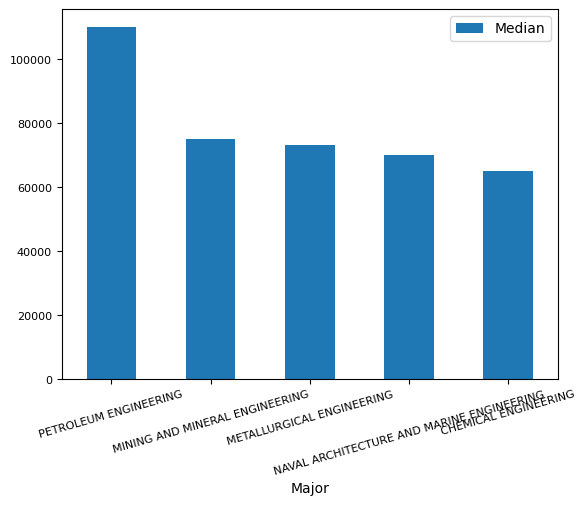

In [50]:
top_5.plot.bar(x="Major", y="Median", rot=16, fontsize=8)

In [52]:
top_medians = df[df['Median'] > 60000].sort_values('Median')
type(top_medians)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Major'>

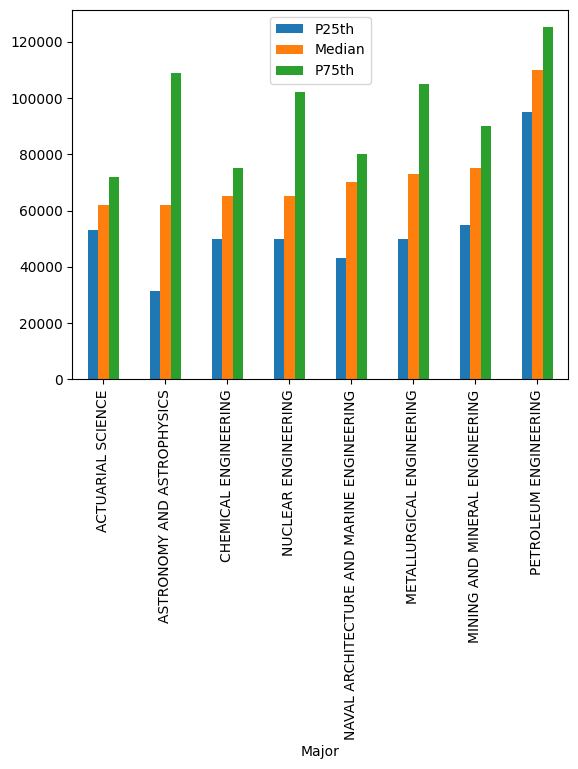

In [53]:
top_medians.plot.bar(x='Major', y=['P25th', 'Median', 'P75th'])

### Analyze correlations

<AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>

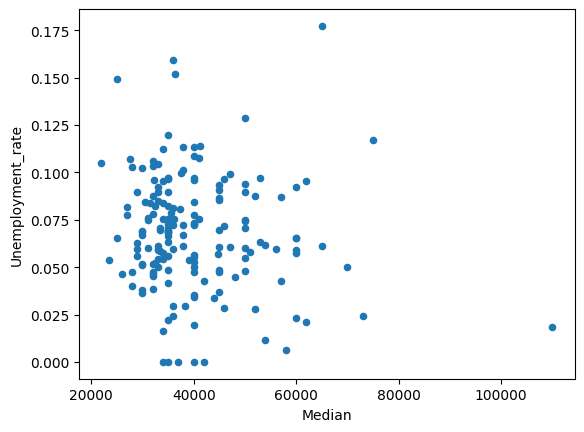

In [54]:
df.plot.scatter(x='Median', y='Unemployment_rate')

### Analyze groups of data points

In [74]:
category_totals = df.groupby('Major_category')['Total']
category_totals = category_totals.sum().sort_values()
category_totals

Major_category
Interdisciplinary                        12296.0
Agriculture & Natural Resources          75620.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64

<AxesSubplot:ylabel='Major_category'>

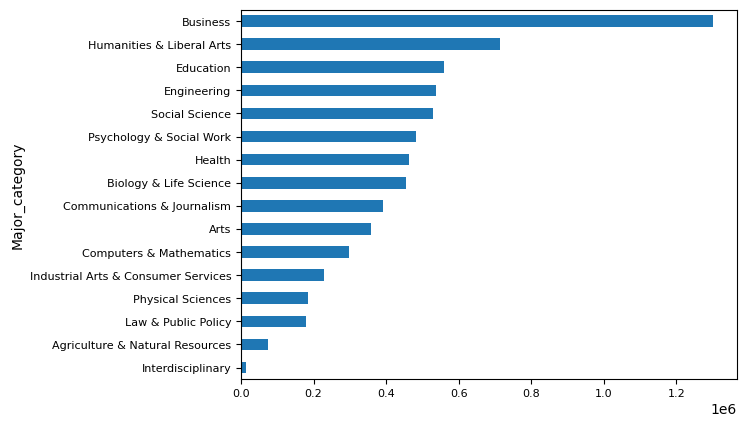

In [64]:
category_totals.plot.barh(fontsize=8)

### Analyze ratios

In [72]:
small_category_totals = category_totals[category_totals < 100000]
small_category_totals

Major_category
Interdisciplinary                  12296.0
Agriculture & Natural Resources    75620.0
Name: Total, dtype: float64

In [76]:
small_sums = pd.Series([small_category_totals.sum()], index=['Other'])
small_sums

Other    87916.0
dtype: float64

In [77]:
big_category_totals = category_totals[category_totals >= 100000]
big_category_totals

Major_category
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64

In [78]:
big_category_totals = big_category_totals.append(small_sums)
big_category_totals

Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Other                                    87916.0
dtype: float64

<AxesSubplot:>

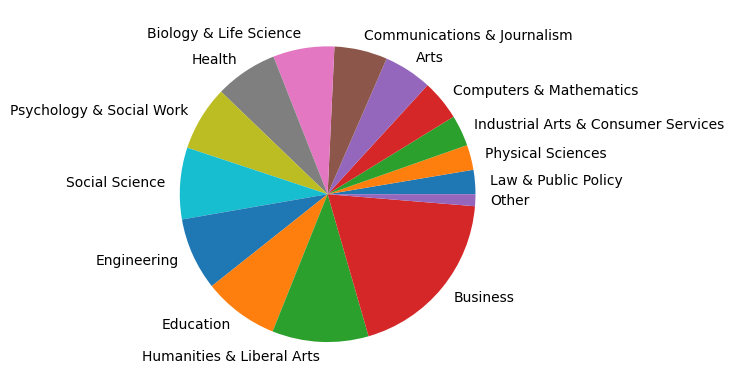

In [79]:
big_category_totals.plot.pie(label='')

In [81]:
# Compare 'Engineering' category with all other categories

engineering_category = df[df['Major_category'] == 'Engineering']['Median']
type(engineering_category)

pandas.core.series.Series

<AxesSubplot:ylabel='Frequency'>

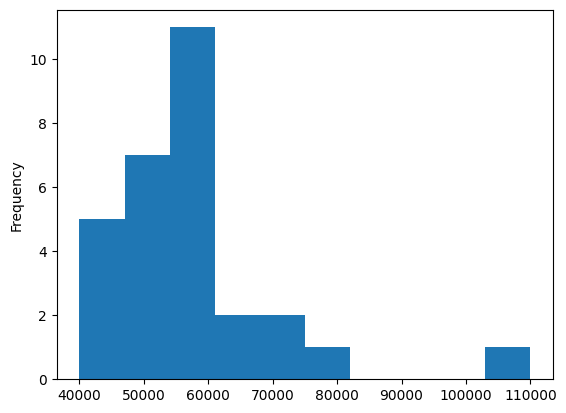

In [82]:
engineering_category.plot.hist()

In [ ]:
# Compare the above chart with the very first histogram chart for the entire data set.
# For Engineering, lowest to the left is at 40,000 while overall for all categories
# is at 20,000. It also peaks in at 60,000 compared to the overall at 40,000.